# Passo 1

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
#from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import sklearn.metrics as metrics
%matplotlib inline

In [243]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [292]:
import os
os.chdir("C:\\Users\\dalto\\Desktop\\Estágio\\Data Science")

dol = pd.read_csv("dados_investpy.csv", sep = ",")
#dol = pd.read_excel("PredDolarInv4.xlsx")
dol["Date"] = pd.to_datetime(dol["Date"]).dt.normalize()
dol = dol.set_index("Date")
dol

,Abertura,Máxima,Mínima,Fechamento,BollingerSup,BollingerInf,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN,TRY,GBAD
Date,,,,,,,,,,,,,,,,,,
2007-05-16,1985.0,1985.5,1954.0,1956.0,2062.50,1985.05,10.912,10.470,10.119,4.7240,4.6310,4.716,68.01,660.2,82.16,10.7782,1.3255,2.3986
2007-05-17,1954.5,1969.5,1953.5,1954.5,2068.42,1971.08,10.904,10.200,9.927,4.7230,4.6820,4.760,70.27,656.2,82.32,10.8142,1.3260,2.3969
2007-05-18,1955.0,1972.0,1955.0,1963.0,2070.48,1962.12,10.915,10.250,9.968,4.7680,4.7320,4.806,69.42,661.0,82.20,10.8000,1.3262,2.4001
2007-05-21,1956.0,1961.0,1940.0,1940.5,2074.92,1948.83,10.899,10.250,9.868,4.8040,4.7160,4.788,70.49,662.9,82.36,10.7665,1.3222,2.3996
2007-05-22,1942.0,1948.0,1934.5,1945.5,2075.32,1939.18,10.895,10.200,9.794,4.8670,4.7650,4.832,69.52,659.1,82.39,10.7960,1.3290,2.4103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-19,5269.0,5358.0,5261.5,5297.0,5369.31,5133.79,8.715,9.462,11.135,0.0406,0.8616,1.363,75.34,1751.4,93.19,19.9820,8.2910,1.8684
2021-09-20,5329.0,5387.0,5316.5,5338.0,5358.32,5140.28,8.595,10.020,11.075,0.0300,0.8260,1.312,73.92,1763.8,93.28,19.9820,8.2910,1.8684
2021-09-21,5320.0,5346.5,5271.5,5280.0,5337.41,5161.73,8.535,9.810,10.815,0.0250,0.8341,1.328,74.36,1778.2,93.22,19.9820,8.2910,1.8684


In [293]:
#dol = dol.replace(0, np.NaN)
#dol = dol.fillna(method = "ffill")
dol.isna().sum().sum()

0

In [294]:
dol["BR1Y-3"] = dol["BR1Y"].pct_change(3)
dol["BR1Y-5"] = dol["BR1Y"].pct_change(5)
dol["BR1Y-20"] = dol["BR1Y"].pct_change(20)
dol["BR1Y-50"] = dol["BR1Y"].pct_change(50)
dol["BR1Y"] = dol["BR1Y"].pct_change(1)

dol["BR3Y-3"] = dol["BR3Y"].pct_change(3)
dol["BR3Y-5"] = dol["BR3Y"].pct_change(5)
dol["BR3Y-20"] = dol["BR3Y"].pct_change(20)
dol["BR3Y-50"] = dol["BR3Y"].pct_change(50)
dol["BR3Y"] = dol["BR3Y"].pct_change(1)

dol["BR10Y-3"] = dol["BR10Y"].pct_change(3)
dol["BR10Y-5"] = dol["BR10Y"].pct_change(5)
dol["BR10Y-20"] = dol["BR10Y"].pct_change(20)
dol["BR10Y-50"] = dol["BR10Y"].pct_change(50)
dol["BR10Y"] = dol["BR10Y"].pct_change(1)

dol["US3M-3"] = dol["US3M"].pct_change(3)
dol["US3M-5"] = dol["US3M"].pct_change(5)
dol["US3M-20"] = dol["US3M"].pct_change(20)
dol["US3M-50"] = dol["US3M"].pct_change(50)
dol["US3M"] = dol["US3M"].pct_change(1)

dol["US5Y-3"] = dol["US5Y"].pct_change(3)
dol["US5Y-5"] = dol["US5Y"].pct_change(5)
dol["US5Y-20"] = dol["US5Y"].pct_change(20)
dol["US5Y-50"] = dol["US5Y"].pct_change(50)
dol["US5Y"] = dol["US5Y"].pct_change(1)

dol["US10Y-3"] = dol["US10Y"].pct_change(3)
dol["US10Y-5"] = dol["US10Y"].pct_change(5)
dol["US10Y-20"] = dol["US10Y"].pct_change(20)
dol["US10Y-50"] = dol["US10Y"].pct_change(50)
dol["US10Y"] = dol["US10Y"].pct_change(1)


dol["OURO-3"] = dol["OURO"].pct_change(3)
dol["OURO-5"] = dol["OURO"].pct_change(5)
dol["OURO-20"] = dol["OURO"].pct_change(20)
dol["OURO-50"] = dol["OURO"].pct_change(50)
dol["OURO"] = dol["OURO"].pct_change(1)

dol["DXY-3"] = dol["DXY"].pct_change(3)
dol["DXY-5"] = dol["DXY"].pct_change(5)
dol["DXY-20"] = dol["DXY"].pct_change(20)
dol["DXY-50"] = dol["DXY"].pct_change(50)
dol["DXY"] = dol["DXY"].pct_change(1)

dol["BRENT-3"] = dol["BRENT"].pct_change(3)
dol["BRENT5"] = dol["BRENT"].pct_change(5)
dol["BRENT-20"] = dol["BRENT"].pct_change(20)
dol["BRENT-50"] = dol["BRENT"].pct_change(50)
dol["BRENT"] = dol["BRENT"].pct_change(1)

dol["MXN-3"] = dol["MXN"].pct_change(3)
dol["MXN-5"] = dol["MXN"].pct_change(5)
dol["MXN-20"] = dol["MXN"].pct_change(20)
dol["MXN-50"] = dol["MXN"].pct_change(50)
dol["MXN"] = dol["MXN"].pct_change(1)

dol["TRY-3"] = dol["TRY"].pct_change(3)
dol["TRY-5"] = dol["TRY"].pct_change(5)
dol["TRY-20"] = dol["TRY"].pct_change(20)
dol["TRY-50"] = dol["TRY"].pct_change(50)
dol["TRY"] = dol["TRY"].pct_change(1)

dol["GBAD-3"] = dol["GBAD"].pct_change(3)
dol["GBAD-5"] = dol["GBAD"].pct_change(5)
dol["GBAD-20"] = dol["GBAD"].pct_change(20)
dol["GBAD-50"] = dol["GBAD"].pct_change(50)
dol["GBAD"] = dol["GBAD"].pct_change(1)

#dol = dol.replace(0, np.NaN)
#dol = dol.fillna(method = "ffill")
dol.isna().sum()

Abertura         0
Máxima           0
Mínima           0
Fechamento       0
BollingerSup     0
                ..
TRY-50          50
GBAD-3           3
GBAD-5           5
GBAD-20         20
GBAD-50         50
Length: 66, dtype: int64

In [295]:

dol["Retorno"] = dol["Fechamento"].pct_change(1)
dol["Retorno5"] = dol["Fechamento"].pct_change(5)
dol["Retorno20"] = dol["Fechamento"].pct_change(20)
dol["Retorno50"] = dol["Fechamento"].pct_change(50)

dol["DistBoll"] = (dol["BollingerSup"] - dol["BollingerInf"])
dol["DistBoll5"] = dol["DistBoll"].pct_change(5)
dol["DistBoll20"] = dol["DistBoll"].pct_change(20)

# Desvio Padrão
dol["std5"] = dol["Fechamento"].rolling(5).std()
dol["std20"] = dol["Fechamento"].rolling(20).std()
dol["std50"] = dol["Fechamento"].rolling(50).std()

# Proporção do corpo do candle em relação ao range do dia
dol["prop"] = (dol["Fechamento"]-dol["Abertura"])/(dol["Máxima"]-dol["Mínima"])


# Zscore
dol["zscore5"] = (dol["Fechamento"]-dol["Fechamento"].rolling(5).mean())/dol["std5"]
dol["zscore20"] = (dol["Fechamento"]-dol["Fechamento"].rolling(20).mean())/dol["std20"]
dol["zscore50"] = (dol["Fechamento"]-dol["Fechamento"].rolling(50).mean())/dol["std50"]

dol["distMM5"] =dol["Fechamento"] - dol["Fechamento"].rolling(5).mean()
dol["distMM5-1"] = dol["distMM5"] - dol["distMM5"].shift(1)
dol["distMM5-3"] = dol["distMM5"] - dol["distMM5"].shift(3)
dol["distMM5-5"] = dol["distMM5"] - dol["distMM5"].shift(5)

dol["distMM20"] =dol["Fechamento"] - dol["Fechamento"].rolling(20).mean()
dol["distMM20-5"] = dol["distMM20"] - dol["distMM20"].shift(5)
dol["distMM20-10"] = dol["distMM20"]- dol["distMM20"].shift(10)
dol["distMM20-20"] = dol["distMM20"]- dol["distMM20"].shift(20)

dol["distMM50"] =dol["Fechamento"] - dol["Fechamento"].rolling(50).mean()
dol["distMM50-5"] = dol["distMM50"] - dol["distMM50"].shift(5)
dol["distMM50-20"] = dol["distMM50"] - dol["distMM50"].shift(20)
dol["distMM50-50"] = dol["distMM50"] - dol["distMM50"].shift(50)

dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , "Alta", "Baixa")
#dol["Alvo"] = np.where(dol["Fechamento"].shift(-1) > dol["Fechamento"] , 1, 0)

#dol["Pips"] = (dol["Fechamento"].shift(1) - dol["Fechamento"])

In [296]:
dol=dol.dropna(axis=0)
dol.isna().sum().sum()

0

In [297]:
dol[dol.columns[78:94]].describe()

,zscore20,zscore50,distMM5,distMM5-1,distMM5-3,distMM5-5,distMM20,distMM20-5,distMM20-10,distMM20-20,distMM50,distMM50-5,distMM50-20,distMM50-50
count,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000,4173.000000
mean,0.077322,0.150781,1.663168,0.001701,-0.004745,0.017829,7.787827,0.144297,0.271328,0.308861,19.672998,0.183863,0.332130,0.784802
std,1.293895,1.384401,34.997247,29.968912,46.607189,50.436014,77.404360,68.002950,89.733049,110.503363,125.983616,69.627516,132.337712,179.243259
min,-3.795783,-4.207301,-244.200000,-240.300000,-345.900000,-359.300000,-542.675000,-390.500000,-611.000000,-772.175000,-635.750000,-408.840000,-1115.400000,-958.080000
25%,-0.983615,-1.021043,-13.100000,-11.600000,-19.800000,-20.700000,-28.050000,-27.650000,-35.700000,-45.025000,-45.960000,-28.910000,-52.670000,-75.890000
50%,0.061278,0.144616,0.500000,0.100000,0.800000,0.500000,1.400000,1.450000,1.625000,3.525000,5.880000,1.750000,3.620000,6.870000
75%,1.117098,1.252529,16.300000,12.300000,20.700000,21.900000,39.725000,30.325000,39.875000,47.825000,76.650000,31.940000,62.780000,92.570000
max,3.503333,5.061790,215.300000,202.400000,297.000000,311.000000,428.150000,509.525000,714.850000,784.525000,661.910000,408.190000,545.710000,656.340000


In [298]:
dol = dol.drop(["Abertura", "Fechamento", "Mínima", "Máxima", 'BollingerSup', 'BollingerInf',], axis = 1)
dol.columns

Index(['BR1Y', 'BR3Y', 'BR10Y', 'US3M', 'US5Y', 'US10Y', 'BRENT', 'OURO',
       'DXY', 'MXN', 'TRY', 'GBAD', 'BR1Y-3', 'BR1Y-5', 'BR1Y-20', 'BR1Y-50',
       'BR3Y-3', 'BR3Y-5', 'BR3Y-20', 'BR3Y-50', 'BR10Y-3', 'BR10Y-5',
       'BR10Y-20', 'BR10Y-50', 'US3M-3', 'US3M-5', 'US3M-20', 'US3M-50',
       'US5Y-3', 'US5Y-5', 'US5Y-20', 'US5Y-50', 'US10Y-3', 'US10Y-5',
       'US10Y-20', 'US10Y-50', 'OURO-3', 'OURO-5', 'OURO-20', 'OURO-50',
       'DXY-3', 'DXY-5', 'DXY-20', 'DXY-50', 'BRENT-3', 'BRENT5', 'BRENT-20',
       'BRENT-50', 'MXN-3', 'MXN-5', 'MXN-20', 'MXN-50', 'TRY-3', 'TRY-5',
       'TRY-20', 'TRY-50', 'GBAD-3', 'GBAD-5', 'GBAD-20', 'GBAD-50', 'Retorno',
       'Retorno5', 'Retorno20', 'Retorno50', 'DistBoll', 'DistBoll5',
       'DistBoll20', 'std5', 'std20', 'std50', 'prop', 'zscore5', 'zscore20',
       'zscore50', 'distMM5', 'distMM5-1', 'distMM5-3', 'distMM5-5',
       'distMM20', 'distMM20-5', 'distMM20-10', 'distMM20-20', 'distMM50',
       'distMM50-5', 'distMM50-20',

In [299]:
# Treinamento de 2017 a 2020.1
sTrain = "2007-05-16"
eTrain = "2015-12-31"
# Teste de 2020.2 até agora 
sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-09-22"

# dfTrain = dff[dff["Data"] <= eTrain]
# dfTest = dff[dff["Data"] > eTrain]

dfTrain = dol.loc[sTrain : eTrain]
dfTest  = dol.loc[sTest  : eTest]
print(dfTrain.shape)
print(dfTest.shape)

(2381, 87)
(1791, 87)


In [300]:
xTrain = dfTrain.drop(["Alvo"], axis = 1)
yTrain = dfTrain["Alvo"]

xTest = dfTest.drop(["Alvo"], axis = 1)
yTest = dfTest["Alvo"]

In [301]:
mlp = MLPClassifier(hidden_layer_sizes = (300), max_iter = 100,
                   solver = "adam", verbose = 10, tol = 1e-8, random_state=42,
                   learning_rate_init = .00005, learning_rate = "adaptive", activation = "tanh") # activation = "tanh"

mlp.fit(xTrain, yTrain)

Iteration 1, loss = 0.82025046
Iteration 2, loss = 0.78440468
Iteration 3, loss = 0.76073576
Iteration 4, loss = 0.74545366
Iteration 5, loss = 0.73495960
Iteration 6, loss = 0.72776936
Iteration 7, loss = 0.72160959
Iteration 8, loss = 0.71605389
Iteration 9, loss = 0.71131575
Iteration 10, loss = 0.70667170
Iteration 11, loss = 0.70249190
Iteration 12, loss = 0.69861032
Iteration 13, loss = 0.69494698
Iteration 14, loss = 0.69129501
Iteration 15, loss = 0.68794554
Iteration 16, loss = 0.68480040
Iteration 17, loss = 0.68187985
Iteration 18, loss = 0.67902287
Iteration 19, loss = 0.67620829
Iteration 20, loss = 0.67365547
Iteration 21, loss = 0.67106857
Iteration 22, loss = 0.66868293
Iteration 23, loss = 0.66637446
Iteration 24, loss = 0.66395637
Iteration 25, loss = 0.66156644
Iteration 26, loss = 0.65932489
Iteration 27, loss = 0.65711283
Iteration 28, loss = 0.65512896
Iteration 29, loss = 0.65294723
Iteration 30, loss = 0.65104252
Iteration 31, loss = 0.64918408
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=300,
              learning_rate='adaptive', learning_rate_init=5e-05, max_iter=100,
              random_state=42, tol=1e-08, verbose=10)

In [302]:
predTrain = mlp.predict(xTrain)
predTest = mlp.predict(xTest)

In [303]:
print(confusion_matrix(yTrain, predTrain))
print()
print("------------------------------------------------")
print()
print(classification_report(yTrain,predTrain))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTrain, predTrain)*100,3))

[[ 526  508]
 [ 173 1174]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.75      0.51      0.61      1034
       Baixa       0.70      0.87      0.78      1347

    accuracy                           0.71      2381
   macro avg       0.73      0.69      0.69      2381
weighted avg       0.72      0.71      0.70      2381


Acurácia:  71.399


In [304]:
print(confusion_matrix(yTest, predTest))
print()
print("------------------------------------------------")
print()
print(classification_report(yTest,predTest))

print()
print("Acurácia: ", round(metrics.accuracy_score(yTest, predTest)*100,3))

[[243 481]
 [308 759]]

------------------------------------------------

              precision    recall  f1-score   support

        Alta       0.44      0.34      0.38       724
       Baixa       0.61      0.71      0.66      1067

    accuracy                           0.56      1791
   macro avg       0.53      0.52      0.52      1791
weighted avg       0.54      0.56      0.55      1791


Acurácia:  55.946


In [305]:
yTest.tail(20)

Date
2021-09-01    Baixa
2021-09-02     Alta
2021-09-03    Baixa
2021-09-05    Baixa
2021-09-06    Baixa
2021-09-07     Alta
2021-09-08    Baixa
2021-09-09     Alta
2021-09-10    Baixa
2021-09-12    Baixa
2021-09-13     Alta
2021-09-14    Baixa
2021-09-15     Alta
2021-09-16     Alta
2021-09-17    Baixa
2021-09-18    Baixa
2021-09-19     Alta
2021-09-20    Baixa
2021-09-21     Alta
2021-09-22     Alta
Name: Alvo, dtype: object

In [306]:
predTest[-20:]

array(['Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa',
       'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa', 'Baixa',
       'Baixa', 'Baixa', 'Alta', 'Baixa', 'Baixa', 'Baixa'], dtype='<U5')

In [307]:
#predTot = mlp.predict(dol.drop(["Alvo"], axis = 1))

In [361]:
dX = pd.read_csv("dados_investpy.csv", sep = ",")
#dol = pd.read_excel("PredDolarInv4.xlsx")
dX["Date"] = pd.to_datetime(dX["Date"]).dt.normalize()
dX = dX.set_index("Date")
dX["Pips"] = (dX["Fechamento"].shift(-1) - dX["Fechamento"])

sTest = "2016-01-01" #"2020-07-01"
eTest = "2021-09-22"

dX  = dX.loc[sTest  : eTest]

dfTest["Pips"] = dX["Pips"].abs()
dfTest["Fechamento"] = dX["Fechamento"]

In [363]:
dfTest

,BR1Y,BR3Y,BR10Y,US3M,US5Y,US10Y,BRENT,OURO,DXY,MXN,...,distMM50,distMM50-5,distMM50-20,distMM50-50,Alvo,Pips,Fechamento,Previsto,RetPips,RetPipsAcumulado
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,143.34,37.54,209.65,234.58,Baixa,0.0,3999.0,Baixa,-0.0,-0.0
2016-01-03,0.000000,0.000000,0.000000,-0.028652,0.011320,0.009696,0.000000,0.000000,0.000000,0.000000,...,139.56,119.75,137.73,249.51,Alta,74.5,3999.0,Baixa,-74.5,-74.5
2016-01-04,-0.008855,-0.001499,-0.005155,-0.028340,-0.025817,-0.020952,-0.001609,0.012935,0.002433,0.007561,...,208.59,188.76,150.89,328.39,Baixa,29.5,4073.5,Alta,29.5,-45.0
2016-01-05,-0.010211,-0.018913,-0.021640,0.303571,-0.009238,-0.001783,-0.021494,0.002554,0.005361,0.001664,...,174.21,23.52,117.85,292.45,Alta,18.5,4044.0,Baixa,-18.5,-63.5
2016-01-06,-0.005158,-0.005202,-0.007788,0.000000,-0.042541,-0.030817,-0.060132,0.011859,-0.002213,0.011610,...,187.90,41.17,123.81,282.66,Alta,14.0,4062.5,Alta,14.0,-49.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-18,0.026502,-0.050953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53.39,52.72,-11.40,-59.99,Baixa,0.0,5297.0,Baixa,-0.0,14503.0
2021-09-19,0.000000,0.000000,0.000000,0.068421,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51.34,23.98,58.61,-31.08,Alta,41.0,5297.0,Alta,41.0,14544.0
2021-09-20,-0.013769,0.058973,-0.005388,-0.261084,-0.041318,-0.037417,-0.018848,0.007080,0.000966,0.000000,...,89.69,86.26,101.90,-6.41,Baixa,58.0,5338.0,Baixa,58.0,14602.0


In [364]:
dolTest=dfTest

In [365]:
dolTest.loc[:,"Previsto"] = predTest
dolTest.loc[:, "RetPips"] = np.where((dolTest.loc[:,"Previsto"] == dolTest.loc[:,"Alvo"]), dolTest.loc[:,'Pips'], -1*dolTest.loc[:,'Pips'])
#dolTest.loc[:, "RetPips"] = np.where(dolTest.loc[:,"Previsto"] == "Baixa", -1*dolTest.loc[:,'Pips'], dolTest.loc[:,"RetPips"])
dolTest.loc[:, "RetPips"] =  dolTest["RetPips"].astype(float)
dolTest.loc[:, "RetPipsAcumulado"] = dolTest["RetPips"].cumsum()


#dol.loc[:,"Previsto"] = predTot
#dol.loc[:,"RetornoMod"] = predTot = dol.loc[:,"Previsto"]*dol["Pips"]

#simulando um stop de 3%

#stop = 0.02
#stop = 10

#dol.loc[:,"RetornoMod"] = np.where(dol.loc[:,"RetornoMod"] < -stop, stop, dol.loc[:, "RetornoMod"])

#dolTest.loc[:,"RetornoModAcum"] = dol["RetornoMod"].cumsum()

In [371]:
dolTest.drop(dolTest.columns[:86], axis=1).tail(20)

,Alvo,Pips,Fechamento,Previsto,RetPips,RetPipsAcumulado
Date,,,,,,
2021-09-01,Baixa,3.0,5208.0,Baixa,3.0,787.0
2021-09-02,Alta,11.0,5205.0,Baixa,-11.0,776.0
2021-09-03,Baixa,0.0,5216.0,Baixa,0.0,776.0
2021-09-05,Baixa,29.0,5216.0,Baixa,29.0,805.0
2021-09-06,Baixa,0.0,5187.0,Baixa,0.0,805.0
2021-09-07,Alta,147.0,5187.0,Baixa,-147.0,658.0
2021-09-08,Baixa,105.0,5334.0,Baixa,105.0,763.0
2021-09-09,Alta,39.0,5229.0,Baixa,-39.0,724.0
2021-09-10,Baixa,0.0,5268.0,Baixa,0.0,724.0


In [367]:
#dol.loc[:, "RetornoModAcum"].tail()
#dff["RetornoModAcum"].tail()
dolTest.loc[:,"RetPipsAcumulado"].tail()

Date
2021-09-18    695.0
2021-09-19    736.0
2021-09-20    794.0
2021-09-21    775.0
2021-09-22    764.5
Name: RetPipsAcumulado, dtype: float64

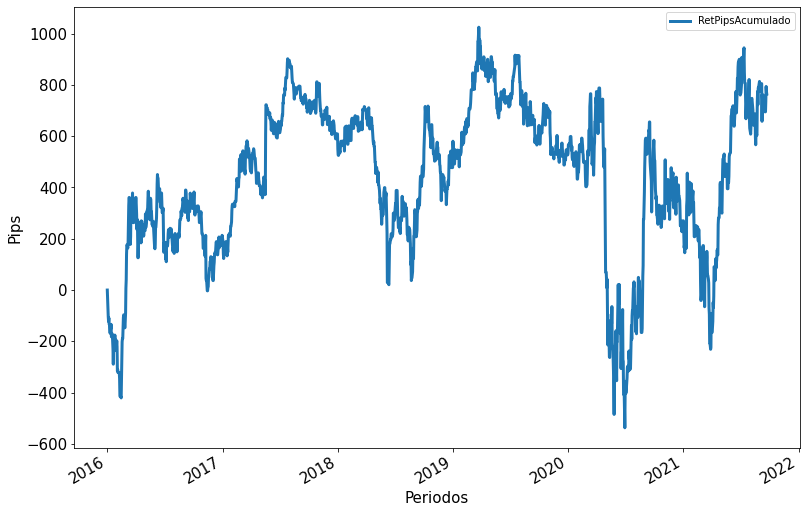

In [368]:
dolTest["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();

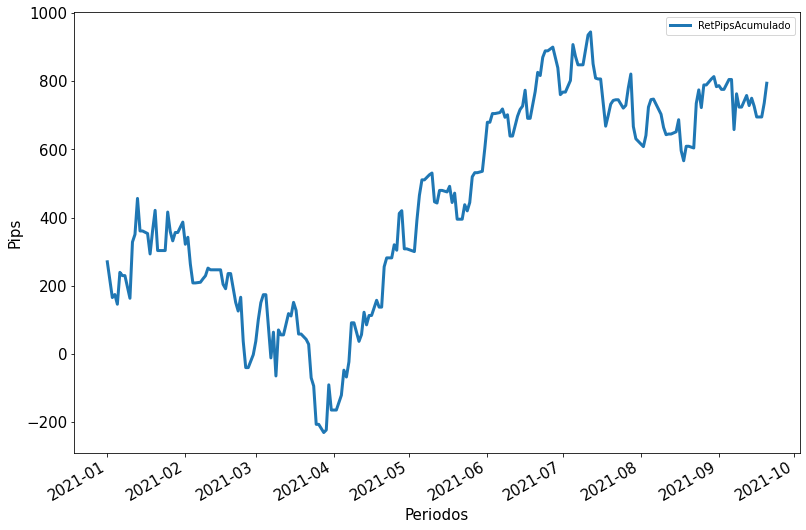

In [369]:
y1 = "2021-01-01"
y2 = "2021-09-20"


X = dolTest.loc[y1  : y2]


X["RetPipsAcumulado"].plot(figsize = (13,9)
                              ,linewidth = 3
                              ,fontsize = 15)
plt.xlabel('Periodos'
          , fontsize = 15)
plt.ylabel('Pips'
          , fontsize = 15)
plt.legend();